## 데이터 그룹연산

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
'''
groupby는 통계자료에서 많이 사용한다
그룹핑 시켜서 데이터의 합을 구하거나 평균치를 구하거나 등등
'''

'\ngroupby는 통계자료에서 많이 사용한다\n그룹핑 시켜서 데이터의 합을 구하거나 평균치를 구하거나 등등\n'

In [3]:
np.random.seed(100)
df1 = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})
df1

,Gender,Smoking,CountA,CountB
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


In [4]:
'''
groupby하면 객체가 리턴된다
데이터가 출력되려면 통계함수와활용해야 한다

Smoking은 Numeric이 아니기에 sum() 적용받지 못 한다
max(),min(),count()는 모든 데이터타입에 적용 가능
'''
df1.groupby('Gender').sum()
df1.groupby('Gender').max()


,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,9
Male,Smoker,9,3


In [5]:
'''
그룹핑할 때 2개 이상 컬럼 가능

EX) 성별, 흡연여부 동시에
'''
df1.groupby(['Gender','Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker      13      11
       Smoker          16      14
Male   Non-Smoker       9       4
       Smoker           9       3

In [6]:
df1.groupby('Gender')['CountA'].sum() # 하나니까 시리즈로 반환

#agg() 을 이용하면 여러 통계함수를 동시  사용 가능
# 내가 만든 함수도 사용가능
df1.groupby('Gender')['CountA'].agg(['sum','mean'])

,sum,mean
Gender,,
Female,29,5.8
Male,18,6.0


In [7]:
# DataFrame으로 리턴하기
df1.groupby('Gender')['CountA'].agg(['sum'])
df1.groupby('Gender')[['CountA']].agg('sum')

,CountA
Gender,
Female,29
Male,18


In [8]:
'''
agg는 aggregation의 약자
여러 통계함수를 동시에 사용 가능
'''
df1.groupby('Gender')['CountA'].agg(['sum','mean','count','max','min'])

,sum,mean,count,max,min
Gender,,,,,
Female,29,5.8,5,9,3
Male,18,6.0,3,9,1


## 실전데이터 응용하기

In [9]:
# 데이터 가져오기
tipdf = pd.read_csv('../data/tips.csv', encoding='utf-8')
tipdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


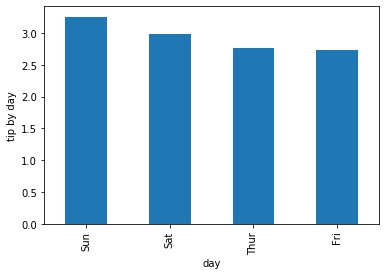

In [10]:
# 날짜별로 그룹핑
tipdf.groupby('day').count()

# 위의 데이터는 아무 의미없다

# 의미를 가지기 위해 :: day컬럼 그룹핑, 요일별 팁의 평균
round(tipdf.groupby('day')['tip'].agg(['mean']),2).sort_values

# 다른 방법
tip_group = tipdf.groupby('day')
tip_group['tip'].mean()

# 정렬까지
tip_group['tip'].mean().sort_values(ascending=False)

# 시각화
tip_group['tip'].mean().sort_values(ascending=False).plot(kind='bar',grid=False)
plt.ylabel('tip by day')
plt.show()

In [11]:
# 이중 그루핑
# 성별, 흡연여부 별로
tip_group2=tipdf.groupby(by=['sex','smoker'])
tip_group2.mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

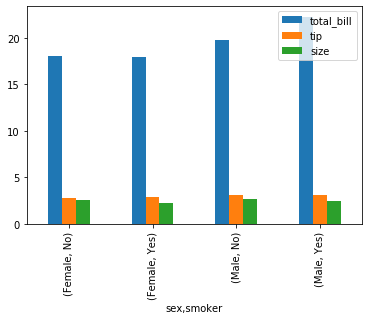

In [12]:
tip_group2.mean().plot(kind='bar')
plt.show()

## 알아두어야 할 함수

In [13]:
'''
1. unique() 
: 한 컬럼 중 중복 제거 값만 출력
SQL에서 Distinct와 동일
'''
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
'''
2. describe()
데이터에 대한 간단한 통계 설명
Numeric 데이터만 가능
'''
df1.describe()

,CountA,CountB
count,8.000000,8.00000
mean,5.875000,4.00000
std,3.044316,2.56348
min,1.000000,1.00000
25%,3.750000,2.75000
50%,6.500000,3.00000
75%,8.250000,5.25000
max,9.000000,9.00000


In [15]:
'''
3, sum(), mean()
총합, 평균
Numeric 데이터만

4. count()
값의 개수

5. value_counts()
각각 해당 컬럼에서 그 값이 몇 번 나왔는지
'''
df1.groupby('Gender').sum()
df1.groupby('Smoking').count()
df1['Smoking'].value_counts()

Non-Smoker    4
Smoker        4
Name: Smoking, dtype: int64

In [32]:
'''
6. apply()
::
판다스에서 내가 만들어서 함수를 작성
사용자함수를 적용할 때 쓰는 함수

판단스에서 제공하지 않는 함수를 내가 만들어서 적용할려면 사용

주의사항: '' 쓰지 말고 함수명 바로 쓰기
'''
def plus(x):
    return x+1001

df1['CountA'].apply(plus)
# df1['CountA'].agg(plus)

KeyError: 'CountA'

In [17]:
'''
7. .colums, info()
컬럼 확인

8. .index
인덱스 확인

9. rename() / colums = []
컬럼 부분 수정 / 컬럼 전체 수정
'''
df1.index
df1.columns = ['가','나','다','라']
df1

,가,나,다,라
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


## Pivot Tables (중요)

In [18]:
'''
pivot_table 함수를 사용해서
DataFrame의 데이터 Reshape한다

그룹핑 역할 == GroupBy

컬럼을 줄 때와 안 줄 때를 그 조건을 알아야 한다
1) 값 + 인덱스
2) 값 + 인덱스 + 컬럼
'''

'\npivot_table 함수를 사용해서\nDataFrame의 데이터 Reshape한다\n\n그룹핑 역할 == GroupBy\n\n컬럼을 줄 때와 안 줄 때를 그 조건을 알아야 한다\n1) 값 + 인덱스\n2) 값 + 인덱스 + 컬럼\n'

In [19]:
data = {
    '도시':['서울','서울','서울','부산','부산','부산','인천','인천'],
    '연도':[2015,2010,2005,2015,2010,2005,2015,2010],
    '인구':[990431,963148,976254,344875,333231,300231,289056,257812],
    '지역':['수도권','수도권','수도권','경상권','경상권','경상권','수도권','수도권']
}
df2 = DataFrame(data)
df2

,도시,연도,인구,지역
0,서울,2015,990431,수도권
1,서울,2010,963148,수도권
2,서울,2005,976254,수도권
3,부산,2015,344875,경상권
4,부산,2010,333231,경상권
5,부산,2005,300231,경상권
6,인천,2015,289056,수도권
7,인천,2010,257812,수도권


In [20]:
# 인덱스(행),열(컬럼),값(밸류)를 지정해야 한다
# margines = True 하면 부분평균, 총평균이 함께 나온다... argfun = mean이기 때문에... 이를 바꾸면 합 등 다양한 통계로 활용 가능
# fill_value : 결측치 처리
df2.pivot_table(values=['인구'],index=['도시'],columns=['연도'])
df2.pivot_table(values='인구',index='도시',columns='연도', margins=True)

연도,2005,2010,2015,All
도시,,,,
부산,300231.0,333231.000000,344875.0,326112.333333
서울,976254.0,963148.000000,990431.0,976611.000000
인천,NaN,257812.000000,289056.0,273434.000000
All,638242.5,518063.666667,541454.0,556879.750000


In [21]:
df2.pivot_table(values=['인구'],index=['연도','도시'])

인구
연도   도시        
2005 부산  300231
     서울  976254
2010 부산  333231
     서울  963148
     인천  257812
2015 부산  344875
     서울  990431
     인천  289056

### 실전데이터 피벗데이블 응용

In [22]:
tipdf=pd.read_csv('../data/tips.csv', encoding='utf-8')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [23]:
'''
분석의 목표
::
식사 대금 대비 팁의 비율이 어떤 경웨 가장 높은지를 알아보기
우선 식사대금과 팁의 비율 컬럼 추가
tip_pct
'''
tipdf['tip_pct'] = tipdf['tip']/tipdf['total_bill']*100
tip_pct_mean = tipdf['tip_pct'].mean()
tip_pct_std = tipdf['tip_pct'].std()
tipdf['tip_pct_std'] = (tipdf['tip_pct']-tip_pct_mean)/tip_pct_std
# tipdf.dropna(inplace=True)
tipdf

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_pct_std
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.944673,-1.659607
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.054159,-0.004274
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.658734,0.094720
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.978041,-0.344218
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.680765,-0.229154
...,...,...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.358352,-1.428130
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.822232,-1.188434
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.820426,-1.024989
243,18.78,3.00,Female,No,Thur,Dinner,2.0,15.974441,-0.017327


In [24]:
# 요일별 팁비율
# round(deci)
tipdf.pivot_table(index='day', aggfunc='mean').round(2)

,size,tip,tip_pct,tip_pct_std,total_bill
day,,,,,
Fri,2.11,2.73,16.99,0.15,17.15
Sat,2.52,2.99,15.32,-0.13,20.44
Sun,2.84,3.26,16.69,0.10,21.41
Thur,2.45,2.77,16.13,0.01,17.68


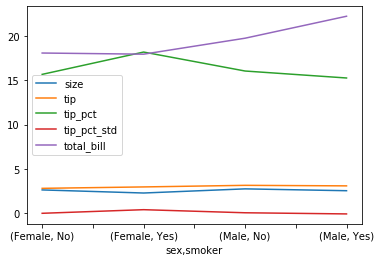

In [25]:
# 성별, 흡연여부별
tipdf.pivot_table(index=['sex','smoker'], aggfunc='mean').round(2).plot(kind='line')
plt.show()

In [26]:
# tipdf.pivot_table(values= ,index=, columns=)
'''
index : 그룹핑 기준
colums : 컬럼값
values : index와 columns 사이의 필드를 채우는 값
'''
tipdf.pivot_table(values=['total_bill','tip'], index=['sex','day'], columns='smoker').round(2)

tip       total_bill       
smoker         No   Yes         No    Yes
sex    day                               
Female Fri   3.12  2.68      19.37  12.65
       Sat   2.72  2.87      19.00  20.27
       Sun   3.33  3.50      20.82  16.54
       Thur  2.46  2.99      16.01  19.22
Male   Fri   2.50  2.74      17.48  20.45
       Sat   3.26  2.88      19.93  21.84
       Sun   3.12  3.52      20.40  26.14
       Thur  2.94  3.06      18.49  19.17

In [27]:
# 문제 : 성별로 그루핑, 칼럼은 흡연여부, tips, count(), 마진
# tipdf.pivot_table('tip',index='sex',columns='smoker',aggfunc='count',margins=True)
tipdf.pivot_table('tip','sex','smoker',aggfunc='count',margins=True)


smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


### 문제1
    - 성별에 따른 평균 팁비율

In [28]:
tipdf.groupby('sex')[['tip_pct']].mean().round(2)
tipdf.pivot_table('tip_pct','sex').round(4)

,tip_pct
sex,
Female,16.6491
Male,15.7651


### 문제2
    - 성별과 흡연 여부에 따른 평균팁비율 (pivot_table, groupby, mean, agg, aggfunc)

In [29]:
tipdf.pivot_table(values='tip_pct',index=['sex','smoker'],aggfunc='mean')
tipdf.groupby(by=['sex','smoker'])[['tip_pct']].mean()

tip_pct
sex    smoker           
Female No      15.692097
       Yes     18.215035
Male   No      16.066872
       Yes     15.277118

In [30]:
# 함수 만들고 쓰기
'''
사용자함수 정의
각각의 그룹에서 가장 많은 팁과 가장 적은 팁의 차이를 리턴
'''
def max_min_tipgap(x):
    return x.max() - x.min()

In [31]:
tipdf.groupby(by=['sex','smoker'])[['tip']].agg('mean')
tipdf.groupby(by=['sex','smoker'])[['tip']].mean()

# 각 그룹 데이터의 최대값과 최소값을 각각 구한다
tipdf.groupby(by=['sex','smoker'])[['tip']].agg(max_min_tipgap)

tip
sex    smoker      
Female No      4.20
       Yes     5.50
Male   No      7.75
       Yes     9.00